In [1]:
!pip install -i https://test.pypi.org/simple/ lambdata-skproj

Looking in indexes: https://test.pypi.org/simple/


In [3]:
from lambdata_skproj import fit_est

this is fit_esp


In [12]:
import numpy as np
import pandas as pd

raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, np.nan, 'Milner', 'Cooze'], 
        'age': [22, np.nan, 23, 24, 25], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'Test1_Score': [4, np.nan, 0, 0, 0],
        'Test2_Score': [0, 0, 0, 0, 0]}
results = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'Test1_Score', 'Test2_Score'])

fit_est.unique_df(results)

age            4
first_name     4
last_name      3
Test1_Score    2
sex            2
Test2_Score    1
dtype: int64

In [13]:
new_results = fit_est.skew_col(results)

In [15]:
results.nunique().index

Index(['first_name', 'last_name', 'age', 'sex', 'Test1_Score', 'Test2_Score'], dtype='object')

In [19]:
results.columns

Index(['first_name', 'last_name', 'age', 'sex', 'Test1_Score', 'Test2_Score'], dtype='object')

In [16]:
results.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
results

,first_name,last_name,age,sex,Test1_Score,Test2_Score
0,Jason,Miller,22.0,m,4.0,0
1,NaN,NaN,NaN,NaN,NaN,0
2,Tina,NaN,23.0,f,0.0,0
3,Jake,Milner,24.0,m,0.0,0
4,Amy,Cooze,25.0,f,0.0,0


In [29]:
mask = pd.Series(data=(results[col].value_counts().max() / results[col].value_counts().sum() for col in results.nunique().index))

In [25]:
mask

0    0.250000
1    0.333333
2    0.250000
3    0.500000
4    0.750000
5    1.000000
dtype: float64

In [18]:
!pip install -i https://test.pypi.org/simple/ lambdata-xpandalord==0.1.8

Looking in indexes: https://test.pypi.org/simple/
  Attempting uninstall: lambdata-xpandalord
    Found existing installation: lambdata-xpandalord 0.1.7
    Uninstalling lambdata-xpandalord-0.1.7:
      Successfully uninstalled lambdata-xpandalord-0.1.7


In [1]:
import lambdata_xpandalord.dataframe_helper as dh

In [2]:
import pandas as pd
pd.options.display.max_columns = None
league = pd.read_csv('../data/high_diamond_ranked_10min.csv')

In [3]:
report = dh.Report(league, 'blueWins')

In [4]:
report.report_missing_values()

Your selected dataframe has 40 columns and 9879 Rows.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
gameId,0,0.0
blueWins,0,0.0
redWardsDestroyed,0,0.0
redFirstBlood,0,0.0
redKills,0,0.0
redDeaths,0,0.0
redAssists,0,0.0
redEliteMonsters,0,0.0
redDragons,0,0.0
redHeralds,0,0.0


In [5]:
train, val, test = report.train_val_test_split()

In [6]:
X_train, y_train = report.target_split(train)
X_val, y_val = report.target_split(val)
X_test, y_test = report.target_split(test)

In [7]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression()

In [8]:
best_est, y_train_pred, y_test_pred = report.report_fit_predict_score(estimator, X_train, y_train, X_val, y_val)

Training Accuracy: 0.5009490667510281
Validation Accuracy: 0.5009487666034156


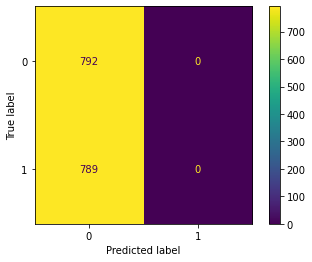

In [9]:
report.plot_confusion_matrix(estimator, X_val, y_val)

In [32]:
import lambdata_xpandalord.dataframe_helper as dh

help(dh.Report.train_val_test_split)

Help on function train_val_test_split in module lambdata_xpandalord.dataframe_helper:

train_val_test_split(self)
    Spliting the dataframe into train, validation, and test sets.



In [28]:
import lambdata_xpandalord.dataframe_helper as dh

help(dh)

Help on module lambdata_xpandalord.dataframe_helper in lambdata_xpandalord:

NAME
    lambdata_xpandalord.dataframe_helper - Some functions to help cleaning and handling dataframes.

CLASSES
    builtins.object
        Report
    
    class Report(builtins.object)
     |  Report(df, target)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, df, target)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  report_confusion_matrix(self, actual, predicted)
     |      Plot a confusion matrix given the actual values and predicted values.
     |      
     |      Keyword arguments:
     |       actual -- an array of the true target values
     |       predicted -- an array of the target values predicted by the estimator
     |  
     |  report_fit_predict_score(self, estimator, train, val)
     |      Report the training and validation accuracy.
     |      Returns the fitted estimator and the two prediction arrays.
     |  
     |  